## Outlier detection 

##### This secsion is a crucial step in data analysis to identify observations that significantly deviate from the rest of the data. These outliers can skew statistical measures and lead to incorrect conclusions if not properly handled

##### There are various techniques for outlier detection that have been learned during the classes.

In this regard, we have employed some techniques such as:
Robust z-score (univariate)
Tukey's method (univariate)
Two-variable ratio (bivariate)
Elliptic Envelope (multivariate)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/descriptive_statistics/discretized_matches_info_df.csv", index_col=0)
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_team_fouls,away_team_fouls,dirty,B365H_log,B365D_log,B365A_log,B365H_classification,B365D_classification,B365A_classification,home_shots_2_score
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,11,8,0,0.451076,1.360977,2.014903,0,0,2,4.0
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,11,12,0,1.360977,1.252763,0.712950,2,0,0,11.0
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,11,9,0,0.641854,1.280934,1.504077,0,0,1,5.5
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,9,11,1,0.916291,1.223775,1.098612,1,0,1,inf
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,9,8,0,1.871802,1.386294,0.476234,2,0,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,3,11,0,0.262364,1.791759,2.397895,0,1,3,5.5
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,9,6,0,0.246860,1.871802,2.397895,0,2,3,inf
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,8,6,0,0.364643,1.558145,2.140066,0,1,2,7.0
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,10,13,0,0.788457,1.252763,1.252763,1,0,1,4.5


### UNIVARIADO

#### Aqui nós utilizamos o método de tukey

Plotamos um boxplot de shots, shots_on_target e corners para poder identificar se existem outliers

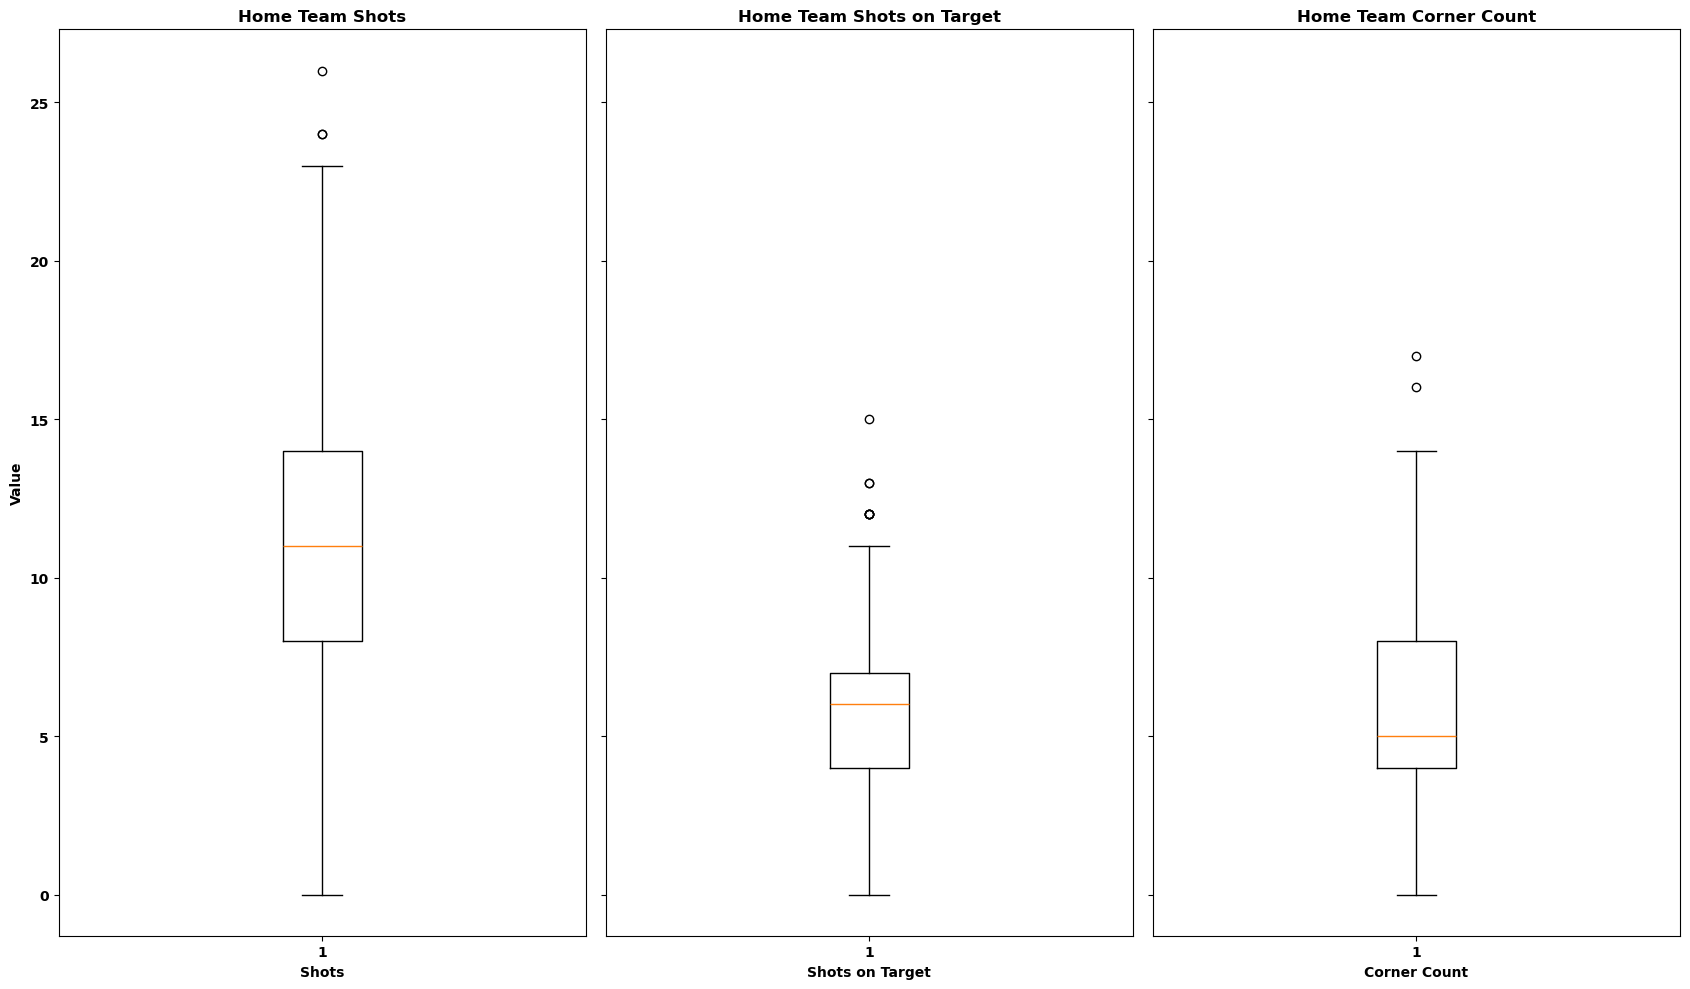

In [51]:
import matplotlib.pyplot as plt

# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_dirty'].dropna()
home_team_corner_count = matches_info_df['home_team_corner_count']

# Criação dos plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(17, 10))

# Plot do boxplot de general_shots
ax1.boxplot(general_shots, vert=True)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Value')

# Plot do boxplot de shots_on_target
ax2.boxplot(shots_on_target, vert=True)
ax2.set_title('Home Team Shots on Target')
ax2.set_xlabel('Shots on Target')

# Plot do boxplot de home_team_corner_count
ax3.boxplot(home_team_corner_count, vert=True, meanline=True)
ax3.set_title('Home Team Corner Count')
ax3.set_xlabel('Corner Count')

# Ajuste do layout
plt.tight_layout()
plt.show()


E após a detecção nós utilizamos o método de tukey que se baseia na diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1), chamado de intervalo interquartil (IQR).

verificando os outliers da colunas de chutes

In [52]:
q1 = general_shots.quantile(q=0.25)
q3 = general_shots.quantile(q=0.75)
iqr = q3 - q1
print(iqr)

6.0


In [53]:
matches_info_df[general_shots < (q1-1.5*iqr)]


,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_team_fouls,away_team_fouls,dirty,B365H_log,B365D_log,B365A_log,B365H_classification,B365D_classification,B365A_classification,home_shots_2_score


#### nao tem outliers inferiores, como mostra o grafico de caixa e as contas

In [54]:
df = matches_info_df[general_shots > (q3+1.5*iqr)]
df[['result','home_team_name', 'B365H', 'B365D', 'B365A', 'away_team_name','home_team_shots']]
# verificamos na net que essas partidas realmente foram assim
# o City pode se explicar pelo seu favoritismo verificado na baixa odd

,result,home_team_name,B365H,B365D,B365A,away_team_name,home_team_shots
17,5,Manchester City,1.10,13.0,26.00,Huddersfield Town,24
265,2,Newcastle United,1.83,3.5,5.25,Huddersfield Town,24
318,2,Manchester City,1.06,17.0,34.00,Cardiff City,26


verificamos que existem 3 outliers "superiores", 2 deles sao do manchester city, com uma odd bem baixa, indicando que era o favorito, entao nao cabe a nos removermos esse, já o do newcastle a odd nem estava tao baixa, após verificarmos no site da premier league, site oficial de jogos, verificamos que os dados estao corretos

Aqui nós utilizamos o método "MAD" que utiliza a mediana em vez da média, que é sensível a valores extremos. Neste caso específico, o método é aplicado ao número de chutes realizados por uma equipe (general_shots)

MAD: 4.447739065974796
Outliers:


,result,home_team_name,B365H,B365D,B365A,away_team_name,home_team_shots


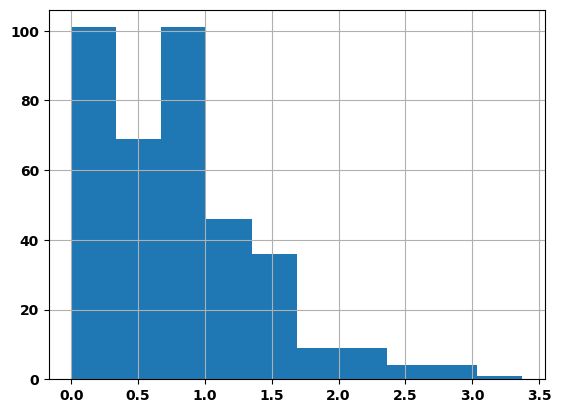

In [55]:
from numpy import abs

# Calcular a mediana
median_shots = general_shots.median()

# Calcular o desvio absoluto em relação à mediana
deviation_from_median = abs(general_shots - median_shots)

# Calcular o MAD
mad = deviation_from_median.median() * (1 / 0.6745)
print(f"MAD: {mad}")

# Plotar o histograma da distribuição dos desvios absolutos normalizados
normalized_deviation = abs(general_shots - median_shots) / mad
normalized_deviation.hist()

# Identificar outliers
outliers = matches_info_df[normalized_deviation > 3.5]

# Exibir os outliers
print("Outliers:")
outliers[['result','home_team_name', 'B365H', 'B365D', 'B365A', 'away_team_name','home_team_shots']]


como podemos ver, por esse metodo nao possue outliers

### BIVARIADO

O método bivariado que estamos utilizando é uma extensão do MAD (Desvio Absoluto da Mediana) para detectar outliers considerando a relação entre duas variáveis.

Com a utilização desse método e os recursos visuais de gráficos, podemos perceber que ele se torna bastante eficaz na detecção e na remoção desses outliers. Isso é evidente ao observarmos os boxplots e os subplots, onde podemos identificar claramente as observações que estão significativamente distantes da distribuição antes de utilizar os métodos e depois de tratar e remover eles.

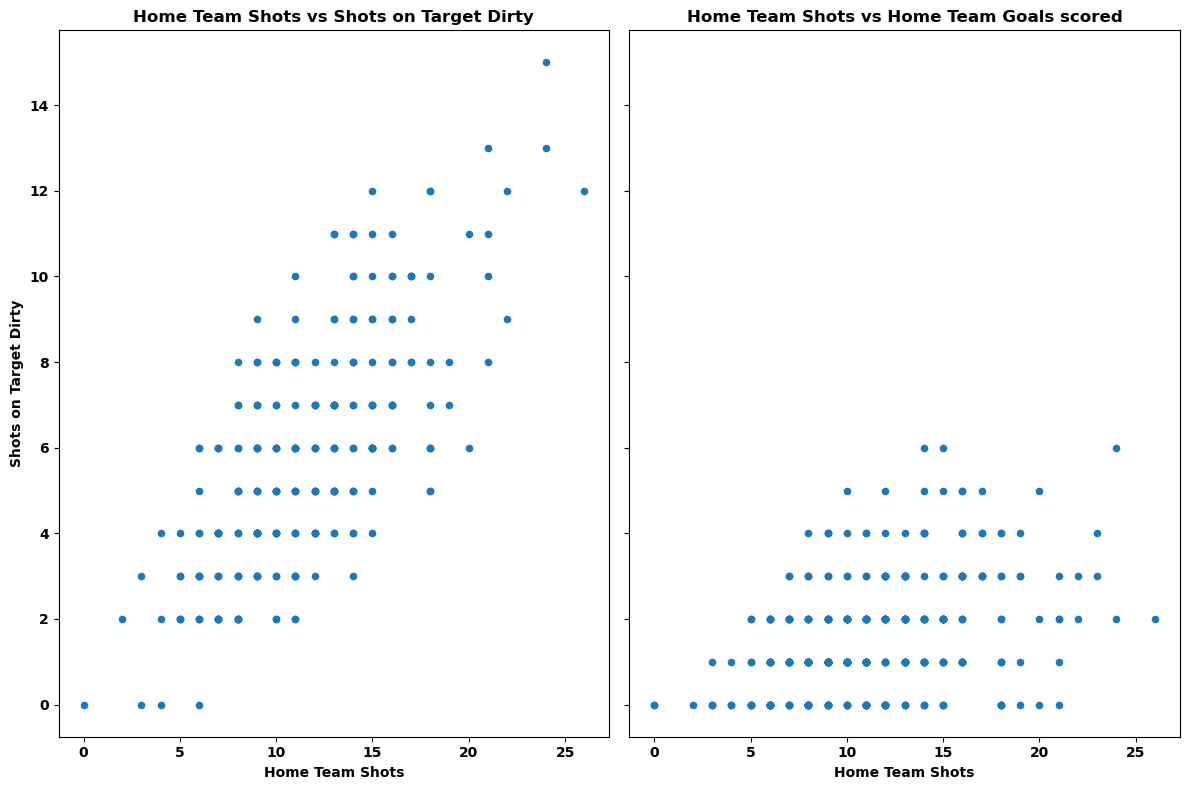

In [56]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

# Plot the first scatter plot
matches_info_df.plot.scatter(x='home_team_shots', y='home_team_shots_on_target_dirty', ax=ax1)
ax1.set_title('Home Team Shots vs Shots on Target Dirty')
ax1.set_xlabel('Home Team Shots')
ax1.set_ylabel('Shots on Target Dirty')

# Plot the second scatter plot
matches_info_df.plot.scatter(x='home_team_shots', y='home_team_goal_count', ax=ax2)
ax2.set_title('Home Team Shots vs Home Team Goals scored')
ax2.set_xlabel('Home Team Shots')

# Adjust the layout
plt.tight_layout()

# Display the figure
plt.show()

vendo a relaçao da acuracia dos chutes em relaçao a chutes na barra

In [57]:
# add coluna de acuracia de chutes convertidos em gols
matches_info_df['acc_shots'] = matches_info_df['home_team_shots_on_target_dirty'] / matches_info_df['home_team_shots']
matches_info_df[['result','home_team_name', 'B365H', 'B365D', 'B365A', 'away_team_name','home_team_shots', 'home_team_shots_on_target_dirty', 'acc_shots']]


,result,home_team_name,B365H,B365D,B365A,away_team_name,home_team_shots,home_team_shots_on_target_dirty,acc_shots
0,1,Manchester United,1.57,3.90,7.50,Leicester City,8,7.0,0.875000
1,-1,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,11,3.0,0.272727
2,2,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,11,5.0,0.454545
3,-2,Fulham,2.50,3.40,3.00,Crystal Palace,11,NaN,NaN
4,-3,Huddersfield Town,6.50,4.00,1.61,Chelsea,6,2.0,0.333333
...,...,...,...,...,...,...,...,...,...
375,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,11,6.0,0.545455
376,-2,Manchester United,1.28,6.50,11.00,Cardiff City,21,11.0,0.523810
377,0,Southampton,1.44,4.75,8.50,Huddersfield Town,7,4.0,0.571429
378,0,Tottenham Hotspur,2.20,3.50,3.50,Everton,9,4.0,0.444444


In [58]:
matches_info_df['acc_shots'].describe()

count    265.000000
mean       0.508660
std        0.185712
min        0.000000
25%        0.384615
50%        0.500000
75%        0.600000
max        1.000000
Name: acc_shots, dtype: float64

<Axes: >

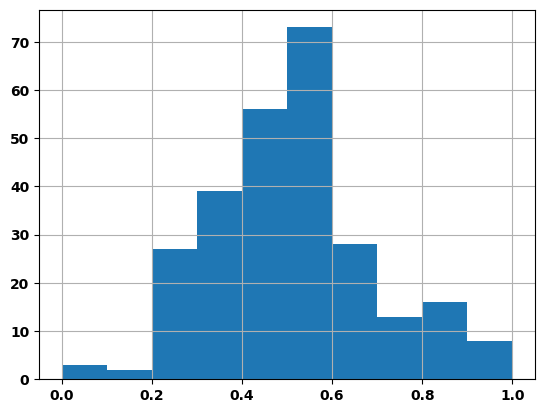

In [59]:
matches_info_df['acc_shots'].hist()

0.17106688715287674


<Axes: >

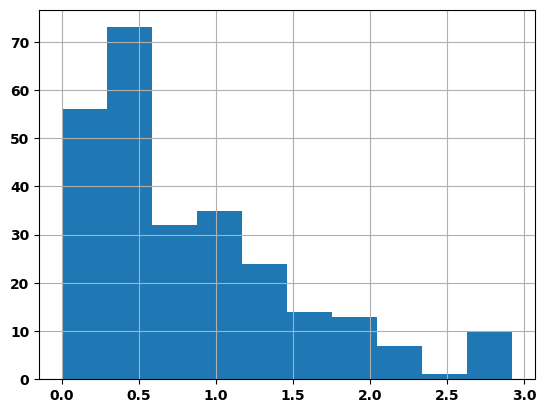

In [60]:
mad = abs(matches_info_df['acc_shots'] - matches_info_df['acc_shots'].median()).median()*(1/0.6745)
print(mad)
(abs(matches_info_df['acc_shots']-matches_info_df['acc_shots'].median())/mad).hist()
     

In [61]:
# Calcular a mediana dos 'acc_shots'
median_acc_shots = matches_info_df['acc_shots'].median()

# Calcular o desvio absoluto em relação à mediana
deviation_from_median = abs(matches_info_df['acc_shots'] - median_acc_shots)

# Calcular o MAD com o fator de escala
mad = deviation_from_median.median() * (1 / 0.6745)

# Filtrar outliers
outliers = matches_info_df[abs(matches_info_df['acc_shots'] - median_acc_shots) / mad > 3.5]

# Selecionar as colunas específicas para exibir quando outliers são encontrados
outliers_info = outliers[['result','home_team_name', 'B365H', 'B365D', 'B365A', 'away_team_name','home_team_shots', 'home_team_shots_on_target_dirty', 'acc_shots']]

# Exibir as informações dos outliers
outliers_info

,result,home_team_name,B365H,B365D,B365A,away_team_name,home_team_shots,home_team_shots_on_target_dirty,acc_shots


podemos observar que nao existe nenhum outlier pelo metodo do mad em relação a acuracia dos chutes

##### vamos verificar em relação a quantos chutes um time precisa dar para marcar um gol

In [62]:
matches_info_df[['result','home_team_name', 'B365H', 'B365D', 'B365A', 'away_team_name','home_team_shots', 'home_team_goal_count', 'home_shots_2_score']]


,result,home_team_name,B365H,B365D,B365A,away_team_name,home_team_shots,home_team_goal_count,home_shots_2_score
0,1,Manchester United,1.57,3.90,7.50,Leicester City,8,2,4.0
1,-1,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,11,1,11.0
2,2,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,11,2,5.5
3,-2,Fulham,2.50,3.40,3.00,Crystal Palace,11,0,inf
4,-3,Huddersfield Town,6.50,4.00,1.61,Chelsea,6,0,inf
...,...,...,...,...,...,...,...,...,...
375,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,11,2,5.5
376,-2,Manchester United,1.28,6.50,11.00,Cardiff City,21,0,inf
377,0,Southampton,1.44,4.75,8.50,Huddersfield Town,7,1,7.0
378,0,Tottenham Hotspur,2.20,3.50,3.50,Everton,9,2,4.5


definindo os infinitos como nans para nao atrapalhar nossos calculos

In [63]:
# Substituir infinitos por NaN
matches_info_df.replace([np.inf, -np.inf], np.nan, inplace=True)

matches_info_df['home_shots_2_score'].describe()

count    294.000000
mean       7.166100
std        3.772286
min        0.000000
25%        4.333333
50%        6.000000
75%        9.000000
max       21.000000
Name: home_shots_2_score, dtype: float64

<Axes: >

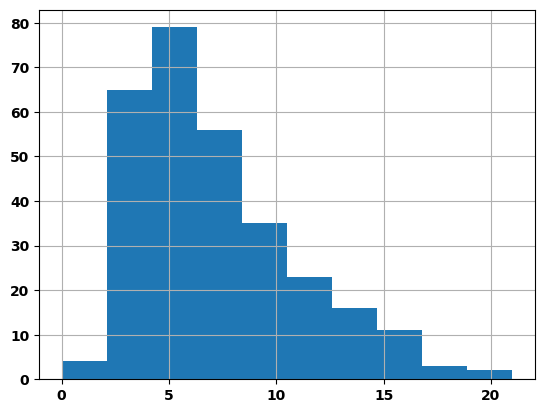

In [64]:
matches_info_df['home_shots_2_score'].hist()

2.965159377316531


<Axes: >

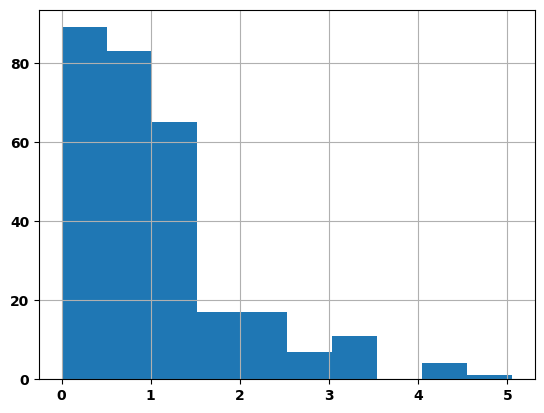

In [65]:
mad = abs(matches_info_df['home_shots_2_score'] - matches_info_df['home_shots_2_score'].median()).median()*(1/0.6745)
print(mad)
(abs(matches_info_df['home_shots_2_score']-matches_info_df['home_shots_2_score'].median())/mad).hist()

In [66]:
# Calcular a mediana dos 'acc_shots'
median_acc_shots = matches_info_df['home_shots_2_score'].median()

# Calcular o desvio absoluto em relação à mediana
deviation_from_median = abs(matches_info_df['home_shots_2_score'] - median_acc_shots)

# Calcular o MAD com o fator de escala
mad = deviation_from_median.median() * (1 / 0.6745)

# Filtrar outliers
outliers = matches_info_df[abs(matches_info_df['home_shots_2_score'] - median_acc_shots) / mad > 3.5]

# Selecionar as colunas específicas para exibir quando outliers são encontrados
outliers_info = outliers[['result','home_team_name', 'B365H', 'B365D', 'B365A', 'away_team_name','home_team_shots', 'home_team_goal_count', 'home_shots_2_score']]

# Exibir as informações dos outliers
outliers_info

,result,home_team_name,B365H,B365D,B365A,away_team_name,home_team_shots,home_team_goal_count,home_shots_2_score
47,1,Wolverhampton Wanderers,1.75,3.6,5.75,Burnley,21,1,21.0
95,0,Leicester City,2.10,3.5,3.80,West Ham United,19,1,19.0
145,0,Fulham,3.00,3.5,2.45,Leicester City,18,1,18.0
278,1,Manchester City,1.16,9.0,19.00,West Ham United,18,1,18.0
347,1,Tottenham Hotspur,1.28,6.0,13.00,Brighton & Hove Albion,18,1,18.0


podemos verificar a presença de 5 outliers, times que tiveram que chutar muitas vezes na partida para conseguir marcar um gol, após a verificação no site oficial da premier league, podemos ver que esses dados estão corretos e nao devem ser removidos

## Removendo outliers com Elliptic Envelope (multivariado)
##### analisando dados que foram muitos disputados e houve muitas finalizações, faltas, cartoes e brigas

#### O método de Elliptic Envelope é uma técnica de detecção de outliers multivariados baseada na estimativa de uma elipse que encapsula a "região normal" dos dados.

In [67]:
matches_normalized=pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/pre_processing_data/normalizaded_matches.csv", index_col=0)
matches_normalized 

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,B365D_classification_0,B365D_classification_1,B365D_classification_2,B365D_classification_3,B365D_classification_4,B365A_classification_0,B365A_classification_1,B365A_classification_2,B365A_classification_3,B365A_classification_4
0,0.090909,0.473684,-0.953510,-0.871429,-0.680040,0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.272727,-0.263158,-0.741112,-0.928571,-0.953862,0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.272727,-0.368421,-0.923428,-0.914286,-0.830491,-0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.454545,-0.894737,-0.868733,-0.942857,-0.905717,-0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.636364,-1.000000,-0.504102,-0.857143,-0.975426,0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,-0.978122,-0.571429,-0.504514,0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
376,-0.454545,0.473684,-0.979945,-0.500000,-0.504514,-0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
377,-0.090909,-0.578947,-0.965360,-0.750000,-0.629890,-1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
378,-0.090909,0.684211,-0.896080,-0.928571,-0.880642,0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


A técnica de Elliptic Envelope

In [68]:
from sklearn.covariance import EllipticEnvelope

# Selecione apenas as colunas numéricas que você deseja considerar na detecção de outliers
numeric_columns = ['home_team_shots', 'away_team_shots','home_team_yellow_cards',
                   'home_team_red_cards','away_team_yellow_cards','away_team_red_cards','home_team_fouls','away_team_fouls',]

# Crie um novo DataFrame contendo apenas as colunas numéricas
numeric_data = matches_normalized[numeric_columns]

# Inicialize o detector de outliers EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)  # O parâmetro contamination define a porcentagem de valores esperados como outliers

# Ajuste o detector aos dados
detector.fit(numeric_data)

EllipticEnvelope(contamination=0.01)

In [69]:
scores = detector.predict(numeric_data)
scores

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [70]:
numeric_data['outlier'] = scores
numeric_data.head()

C:\Users\diogo\AppData\Local\Temp\ipykernel_16660\1967186183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['outlier'] = scores


,home_team_shots,away_team_shots,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,outlier
0,-0.384615,-0.294118,-0.333333,-1.0,-0.6,-1.0,-0.043478,-0.444444,1
1,-0.153846,0.294118,-0.333333,-1.0,-0.2,-1.0,-0.043478,0.000000,1
2,-0.153846,-0.411765,-0.666667,-1.0,-0.6,-1.0,-0.043478,-0.333333,1
3,-0.153846,0.058824,-0.666667,-1.0,-0.2,-1.0,-0.217391,-0.111111,1
4,-0.538462,-0.294118,-0.333333,-1.0,-0.6,-1.0,-0.217391,-0.444444,1


In [71]:
outlier_indices = np.where(numeric_data['outlier'] == -1)
outlier_rows = matches_info_df.iloc[outlier_indices]
selected_columns = ['result', 'home_team_name', 'B365H', 'B365D', 'B365A', 'away_team_name',
                    'home_team_shots', 'away_team_shots', 'home_team_yellow_cards',
                    'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards',
                    'home_team_fouls', 'away_team_fouls']
outlier_rows[selected_columns]

,result,home_team_name,B365H,B365D,B365A,away_team_name,home_team_shots,away_team_shots,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls
21,0,AFC Bournemouth,2.62,3.6,2.75,Everton,16,9,0,1,3,1,12,10
158,-1,Newcastle United,2.90,3.2,2.70,Wolverhampton Wanderers,10,12,2,1,5,0,10,17
204,-1,Huddersfield Town,2.14,3.1,4.20,Burnley,6,16,1,1,4,1,11,9
361,1,AFC Bournemouth,4.00,4.0,1.90,Tottenham Hotspur,14,9,1,0,5,2,11,12


Como observado, a técnica conseguiu identificar com precisão os valores mais discrepantes. Isso foi realizado ao usar a função "detector.predict(numeric_data)" para prever os rótulos de outliers para cada observação e, em seguida, "np.where(numeric_data['outlier'] == -1)" para localizar as posições onde esses rótulos indicam outliers. Essa abordagem não apenas nos permite visualizar graficamente os outliers, mas também entender quais observações se destacam significativamente em relação ao restante do conjunto de dados.

podemos ver que essas partidas identificadas eram partidas que realmente foram bastante equilibradas, com muitos cartoes chutes, faltas e brigas

Porém, após verificação das partidas, todos os dados estão corretos